In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Toy dataset: points on 2D plane labeled by quadrant
torch.manual_seed(0)
N = 200
X = torch.randn(N, 2)
y = (X[:, 0] * X[:, 1] > 0).float().unsqueeze(1)  # 1 if same sign, else 0


In [5]:
class SimpleNet(nn.Module):
    def __init__(self, zero_init=False):
        super().__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 1)

        if zero_init:
            nn.init.zeros_(self.fc1.weight)
            nn.init.zeros_(self.fc1.bias)
            nn.init.zeros_(self.fc2.weight)
            nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))


In [6]:
def train(model, lr=0.1, steps=1000):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    losses = []

    for step in range(steps):
        y_pred = model(X)
        loss = F.binary_cross_entropy(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses


In [7]:
model_zero = SimpleNet(zero_init=True)
model_rand = SimpleNet(zero_init=False)

loss_zero = train(model_zero)
loss_rand = train(model_rand)


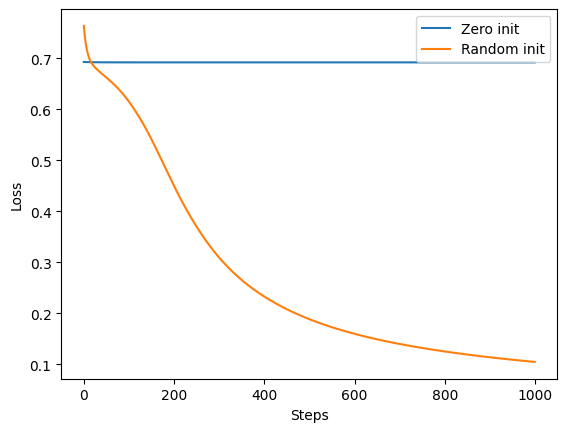

In [8]:
plt.plot(loss_zero, label='Zero init')
plt.plot(loss_rand, label='Random init')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
torch.log(torch.tensor(0.5))

tensor(-0.6931)

In [12]:
y.shape

torch.Size([200, 1])